In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import *
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
 iris = load_iris()

In [42]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df = iris_df[ (iris_df['target'] == 0) | (iris_df['target'] == 1) ]

In [18]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [19]:
features =  ['petal length (cm)',	'petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values


In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
        print("Mean and Standard Deviation Before")
        print(X.mean(axis=0), X.std(axis=0))

        sc=StandardScaler()
        
        XScaled = sc.fit_transform(X)
        

        print("Mean and Standard Deviation After")
        print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
        return XScaled

XScaled = normalize(X)

Mean and Standard Deviation Before
[2.861 0.786] [1.44228257 0.56232019]
Mean and Standard Deviation After
[-0.  0.] [1. 1.]


In [21]:
from sklearn.model_selection import train_test_split

def splitTrainTest(X, Y, seed):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
     
        print("Dimensions of Original Data:")
        print("Size(X):", X.shape, "; Size(Y)", Y.shape)
        print("Dimensions of Training Data:")
        print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
        print("Dimensions of Test Data:")
        print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)
        return X_train, X_test, Y_train, Y_test
       
X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)

Dimensions of Original Data:
Size(X): (100, 2) ; Size(Y) (100,)
Dimensions of Training Data:
Size(X_train): (80, 2) ; Size(Y_train) (80,)
Dimensions of Test Data:
Size(X_test): (20, 2) ; Size(Y_test) (20,)


In [22]:
X = X_train
Y = Y_train
# sns.scatterplot(X[:,0], X[:,1], hue=Y)
# plt.xlabel("Petal Length")
# plt.ylabel("Petal Width")

In [23]:

def sigmoid(z):
    return 1/(1+ np.exp(-z))  

def computeCost(X, Y, b, w1, w2, lem):
    
    N=X.shape[0]
    z = w1*X[:,0] + w2*X[:,1] + b
    f_x = sigmoid(z)          
    lossL = (Y*np.log(f_x)+(1-Y)*np.log(1-f_x)) +(lem/2*N)*((w1*w1)+(w2*w2)) 
    costJ = (-1/N) * np.sum( lossL )
    return costJ

def gradientDescent (X, Y, LearningRate,lem, numIterations):
    N, d = X.shape
    b, w1, w2 = 1,1,1
    errorList =[] 
    for i in range(numIterations):

        z = w1*X[:,0] + w2*X[:,1] + b
        f_x = sigmoid(z)  

        deltaJb = 1/N*sum(f_x-Y)
        deltaJw1 =(1/N*sum((f_x-Y)*X[:,0]))+(lem/N)*w1
        deltaJw2 = (1/N*sum((f_x-Y)*X[:,1]))+(lem/N)*w2   
        
        
        b = b - LearningRate*deltaJb
        
        w1 = w1 - LearningRate*deltaJw1 
        w2 = w2 - LearningRate*deltaJw2
       
        costJ = computeCost(X, Y, b, w1, w2,lem)
        errorList.append(costJ)
        
    plt.plot(range(numIterations), errorList)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    print(" b",b)
    print(" w1",w1)
    print(" w2",w2)
    
    return b, w1, w2

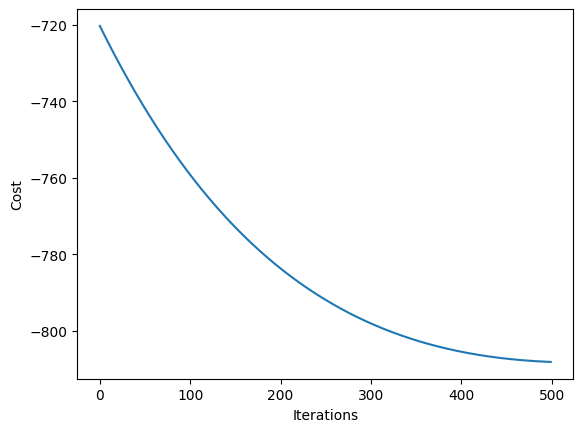

 b 0.6714547035586989
 w1 1.0659278314877152
 w2 1.0531103914584692


In [24]:
b, w1, w2 = gradientDescent(X, Y, 0.009,9 ,numIterations=500)

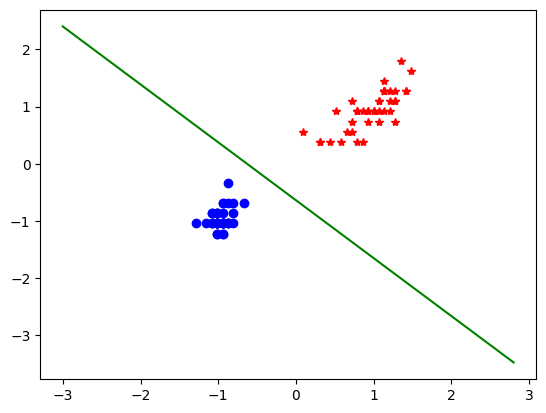

In [25]:
def plotDecisionBoundary(X_train, Y_train, w1, w2, b):
        plt.plot(X_train[Y_train==0,0], X_train[Y_train==0,1], 'bo')
        plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], 'r*')
        x=np.arange(-3,3,0.2)
        y=-(w1*x + b)/w2    
        plt.plot(x,y,'g-')
plotDecisionBoundary(X_train, Y_train, w1, w2, b)

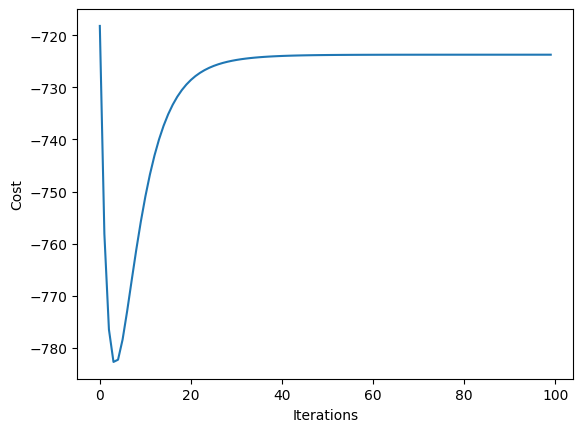

 b 0.1682341748689855
 w1 1.078634259396496
 w2 1.0481614496136196


In [26]:
b, w1, w2 = gradientDescent(X, Y, 1.2, 8,numIterations=100)

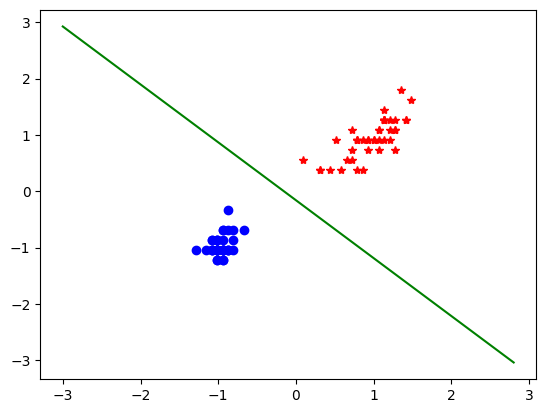

In [27]:
def plotDecisionBoundary(X_train, Y_train, w1, w2, b):
        plt.plot(X_train[Y_train==0,0], X_train[Y_train==0,1], 'bo')
        plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], 'r*')
        x=np.arange(-3,3,0.2)
        y=-(w1*x + b)/w2   
        plt.plot(x,y,'g-')
plotDecisionBoundary(X_train, Y_train, w1, w2, b)

In [28]:
def evaluatePerformance(X, Y, b, w1, w2):
    z = w1*X[:,0] + w2*X[:,1] + b
    f_x = sigmoid(z)
    Y_pred = np.where(f_x > 0.5, 1, 0)
    acc = np.mean(Y_pred == Y)
    return acc * 100
testAccuracy = evaluatePerformance(X_test, Y_test, b, w1, w2)
print("Test Accuracy", testAccuracy)
trainAccuracy = evaluatePerformance(X_train, Y_train, b, w1, w2)
print("Train Accuracy", trainAccuracy)
     

Test Accuracy 100.0
Train Accuracy 100.0


In [35]:
def predictY(X, Y, b, w1, w2):
    z = w1*X[:,0] + w2*X[:,1] + b
    f_x = sigmoid(z)
    Y_pred = np.where(f_x > 0.5, 1, 0)
    return Y_pred
Y_pred = predictY(X_test, Y_test, b, w1, w2)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[13  0]
 [ 0  7]]
